Connessione a spotipy

In [2]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import json
import os 

# Configura le tue credenziali Spotify
client_id = os.getenv('YOUR_CLIENT_ID')
client_secret = os.getenv('YOUR_CLIENT_SECRET')
redirect_uri = os.getenv('YOUR_REDIRECT_URI')

scope = "user-library-read playlist-read-private"

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=client_id,
                                               client_secret=client_secret,
                                               redirect_uri=redirect_uri,
                                               scope=scope))

In [4]:
# Initialize an empty list to store the results
results = []

# Set the batch size (max 50 for Spotify API)
batch_size = 5

# Get the total number of saved tracks
total_tracks = sp.current_user_saved_tracks(limit=1)['total']
print(f"Total tracks: {total_tracks}")

total_tracks = 50
# Loop through batches of saved tracks
for offset in range(0, total_tracks, batch_size):
    tracks = sp.current_user_saved_tracks(limit=batch_size, offset=offset)
    track_ids = [item['track']['id'] for item in tracks['items']]
    print(f"Track IDs: {track_ids}")    
    # Apply the get_audio_features_and_analysis function
    track_data = get_audio_features_and_analysis(track_ids)
    # Append the result to the list
    results.append(track_df)

# Print or process the results as needed
for result in results:
    print("---")
    print(json.dumps(result, indent=4))

Total tracks: 9695
Track IDs: ['2qNpmmWewO58DmBHH9i0ug', '2W10cBw9jdMsyQLHFiOPr4', '0T4njSTUzEEBWT33eyXEFQ', '58l6rUrdGNOtLRsX93w40N', '6wVViUl2xSRoDK2T7dMZbR']
Track IDs: ['4jfsySxBIePLrNq5FYYjyv', '6FTUpZS85JMQzFEQ7wOqVK', '1SIXMGcsAeA6sNxaY1EG3O', '3NYm3ZimuJNb0Z0px5OEwO', '27wbCVE2JA72qLZVt7pTuF']
Track IDs: ['40oMDrqiESAbKzfnK6avpB', '0O9havTTUkI5F5LitVgfYH', '2bIQ3AcOR8iJET9rjPenwZ', '7HwJIBgn20ju7eNO6nruJr', '4oc6DZ88xXPRB73im61qQ3']
Track IDs: ['69VkZ3Cir9A2Ty8KK2iAPJ', '3CX5VhuqcEtpmw9geTjgFw', '04YmzxDpkbyZAqYAPxrIvL', '4SDHCwOeB2wRqMU2apwjOm', '6gqc6STXIYeiS6hrIsffZm']
Track IDs: ['1TlkiBE60Atl0L5eWMJuhp', '5YI4ANY438BgIlVFf0RRY0', '2rgePSNSSgx9Vuh0nuQvGN', '4w5BFGIlRDdPaadbCrl0o4', '1xBMyLQh9cxjwRdwUqdLxC']
Track IDs: ['5M4NtLXIQ23xuykkewzOcQ', '6RgEcaYUoCs8LUCz9ZHdAe', '1vP2JEXRsGrFbwOZ0foOQ5', '2NlJymtVguf4oLslA73ojG', '4Kk6qU2ypfNUr6IBKojRkt']
Track IDs: ['3FChADSthLqW3Lsh2fohXd', '2T3kx5mr3vBlBjnNq6gpan', '6269LuPYYfI56nNNs84YWt', '6PIuuyPtky0MGlv3kHEC3T', '1pT7brYEKcQV

In [9]:
import pickle
import json
import os
import time

def update_pickle(new_data, pickle_file='spotify_data.pickle'):
    if os.path.exists(pickle_file):
        with open(pickle_file, 'rb') as f:
            existing_data = pickle.load(f)
        for key in new_data:
            if key in existing_data:
                existing_data[key].extend(new_data[key])
            else:
                existing_data[key] = new_data[key]
    else:
        existing_data = new_data
    
    with open(pickle_file, 'wb') as f:
        pickle.dump(existing_data, f)

# Set the batch size (max 50 for Spotify API)
batch_size = 50

# Get the total number of saved tracks
total_tracks = sp.current_user_saved_tracks(limit=1)['total']
print(f"Total tracks: {total_tracks}")
total_tracks = 200

# Uncomment the next line if you want to limit the number of tracks for testing
# total_tracks = 5

# Start timer for the entire process
start_time_total = time.time()

# Loop through batches of saved tracks
for offset in range(0, total_tracks, batch_size):
    # Start timer for this batch
    start_time_batch = time.time()

    tracks = sp.current_user_saved_tracks(limit=batch_size, offset=offset)
    track_ids = [item['track']['id'] for item in tracks['items']]
    print(f"Processing track IDs: {track_ids}")    
    
    # Apply the get_audio_features_and_analysis function
    track_data = get_audio_features_and_analysis(track_ids, audio_analysis=True)
    
    # Update the pickle file with this batch of data
    update_pickle(track_data)
    
    print(f"Processed and saved tracks {offset} to {min(offset+batch_size, total_tracks)}")
    
    # Optional: print the data for this batch
    print("---")
    print(json.dumps(track_data, indent=4))

    # End timer for this batch
    end_time_batch = time.time()
    print(f"Time taken for this batch: {end_time_batch - start_time_batch:.2f} seconds")

# End timer for the entire process
end_time_total = time.time()
print(f"Total time taken: {end_time_total - start_time_total:.2f} seconds")

print("All data processed and saved.")

# If you want to read and display all the data at the end:
with open('spotify_data.pickle', 'rb') as f:
    all_data = pickle.load(f)

print("\nAll data from pickle file:")
print(json.dumps(all_data, indent=4))


Total tracks: 9695
Processing track IDs: ['2qNpmmWewO58DmBHH9i0ug', '2W10cBw9jdMsyQLHFiOPr4', '0T4njSTUzEEBWT33eyXEFQ', '58l6rUrdGNOtLRsX93w40N', '6wVViUl2xSRoDK2T7dMZbR', '4jfsySxBIePLrNq5FYYjyv', '6FTUpZS85JMQzFEQ7wOqVK', '1SIXMGcsAeA6sNxaY1EG3O', '3NYm3ZimuJNb0Z0px5OEwO', '27wbCVE2JA72qLZVt7pTuF', '40oMDrqiESAbKzfnK6avpB', '0O9havTTUkI5F5LitVgfYH', '2bIQ3AcOR8iJET9rjPenwZ', '7HwJIBgn20ju7eNO6nruJr', '4oc6DZ88xXPRB73im61qQ3', '69VkZ3Cir9A2Ty8KK2iAPJ', '3CX5VhuqcEtpmw9geTjgFw', '04YmzxDpkbyZAqYAPxrIvL', '4SDHCwOeB2wRqMU2apwjOm', '6gqc6STXIYeiS6hrIsffZm', '1TlkiBE60Atl0L5eWMJuhp', '5YI4ANY438BgIlVFf0RRY0', '2rgePSNSSgx9Vuh0nuQvGN', '4w5BFGIlRDdPaadbCrl0o4', '1xBMyLQh9cxjwRdwUqdLxC', '5M4NtLXIQ23xuykkewzOcQ', '6RgEcaYUoCs8LUCz9ZHdAe', '1vP2JEXRsGrFbwOZ0foOQ5', '2NlJymtVguf4oLslA73ojG', '4Kk6qU2ypfNUr6IBKojRkt', '3FChADSthLqW3Lsh2fohXd', '2T3kx5mr3vBlBjnNq6gpan', '6269LuPYYfI56nNNs84YWt', '6PIuuyPtky0MGlv3kHEC3T', '1pT7brYEKcQVYKLCbkIMpn', '3Q44LJn5l5OY4aSp7aZvrd', '5bsYpjfPaItASe2rB5nWI

In [10]:
import pickle

with open('spotify_data.pickle', 'rb') as f:
    pickle_data = pickle.load(f)

print(pickle_data.keys())
for key in pickle_data:
    print(f"{key}: {len(pickle_data[key])}")


dict_keys(['album', 'artist', 'duration_s', 'name', 'popularity', 'id', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'valence', 'tempo', 'time_signature', 'segments', 'bars', 'beats', 'sections', 'tatums'])
album: 200
artist: 200
duration_s: 200
name: 200
popularity: 200
id: 200
acousticness: 200
danceability: 200
energy: 200
instrumentalness: 200
key: 200
liveness: 200
loudness: 200
mode: 200
speechiness: 200
valence: 200
tempo: 200
time_signature: 200
segments: 200
bars: 200
beats: 200
sections: 200
tatums: 200


In [3]:
# import data from pickle file
import pickle
with open('spotify_data.pickle', 'rb') as f:
    pickle_data = pickle.load(f)

# Convert the data to a pandas DataFrame
import pandas as pd
df = pd.DataFrame(pickle_data)
df.head()
len(df)
df.head()

,album,artist,duration_s,name,popularity,id,acousticness,danceability,energy,instrumentalness,...,mode,speechiness,valence,tempo,time_signature,segments,bars,beats,sections,tatums
0,Oh No It's Devo / Freedom Of Choice,DEVO,154.533,What I Must,8,2qNpmmWewO58DmBHH9i0ug,0.1190,0.786,0.603,0.50000,...,0,0.0428,0.672,148.955,4,516,94,378,9,756
1,Oh No It's Devo / Freedom Of Choice,DEVO,163.693,Big Mess,24,2W10cBw9jdMsyQLHFiOPr4,0.1970,0.658,0.677,0.78600,...,1,0.0355,0.779,164.325,4,720,111,446,9,892
2,Oh No It's Devo / Freedom Of Choice,DEVO,213.666,Out Of Sync,12,0T4njSTUzEEBWT33eyXEFQ,0.1580,0.724,0.727,0.00239,...,1,0.0358,0.799,148.281,4,931,129,523,19,1046
3,Oh No It's Devo / Freedom Of Choice,DEVO,208.160,Gates Of Steel,25,58l6rUrdGNOtLRsX93w40N,0.0023,0.612,0.775,0.12000,...,1,0.0335,0.643,157.352,4,907,134,537,14,1074
4,Brotherhood (Collector's Edition),New Order,263.213,Bizarre Love Triangle,63,6wVViUl2xSRoDK2T7dMZbR,0.0804,0.613,0.885,0.74600,...,1,0.0520,0.919,118.506,4,1391,127,509,12,1018


## CLustering

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def perform_kmeans_clustering(df, features, max_clusters=10, optimal_k=None):
    """
    Perform K-means clustering on the given DataFrame.
    
    Parameters:
    df (pandas.DataFrame): Input DataFrame
    features (list): List of feature column names to use for clustering
    max_clusters (int): Maximum number of clusters to consider for elbow method
    optimal_k (int): Optimal number of clusters. If None, user should determine from elbow curve.
    
    Returns:
    pandas.DataFrame: Original DataFrame with added 'Cluster' column
    """
    
    # Normalize the features
    scaler = StandardScaler()
    normalized_features = scaler.fit_transform(df[features])

    # Determine optimal number of clusters (elbow method)
    inertias = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(normalized_features)
        inertias.append(kmeans.inertia_)

    # Plot elbow curve
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_clusters + 1), inertias, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.show()

    if optimal_k is None:
        print("Please determine the optimal number of clusters from the elbow curve.")
        return df

    # Apply K-means with optimal number of clusters
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    cluster_labels = kmeans.fit_predict(normalized_features)

    # Add cluster labels to the original dataset
    df_with_clusters = df.copy()
    df_with_clusters['Cluster'] = cluster_labels

    # Visualize results (using first two features)
    plt.figure(figsize=(10, 6))
    plt.scatter(df[features[0]], df[features[1]], c=cluster_labels, cmap='viridis')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.title('K-means Clustering Results')
    plt.show()

    return df_with_clusters

# Example usage:
# features = ['energy', 'danceability', 'tempo']
# result_df = perform_kmeans_clustering(df, features, optimal_k=8)



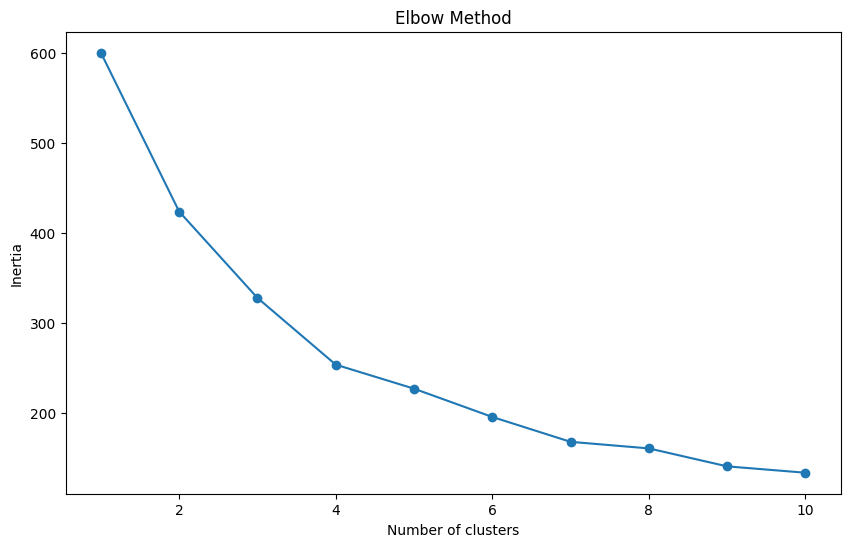

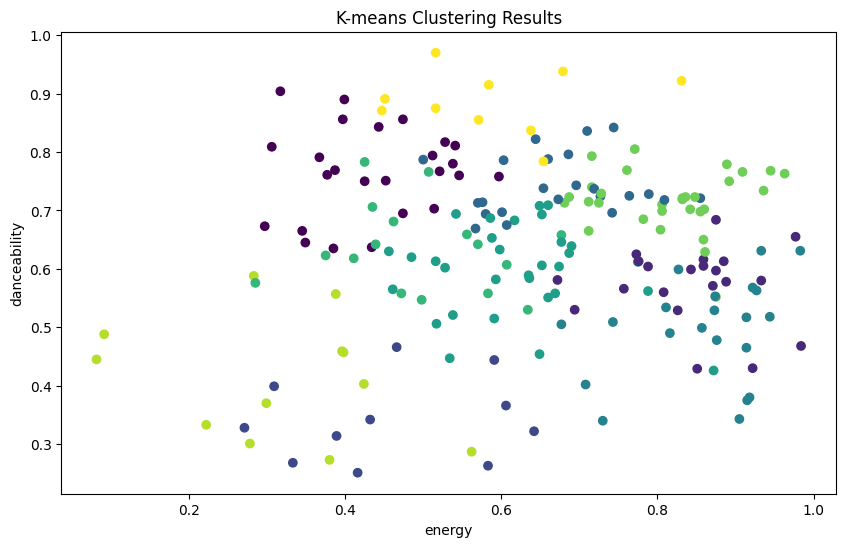

,album,artist,duration_s,name,popularity,id,acousticness,danceability,energy,instrumentalness,...,speechiness,valence,tempo,time_signature,segments,bars,beats,sections,tatums,Cluster
0,Oh No It's Devo / Freedom Of Choice,DEVO,154.533,What I Must,8,2qNpmmWewO58DmBHH9i0ug,0.11900,0.786,0.603,0.500000,...,0.0428,0.672,148.955,4,516,94,378,9,756,3
1,Oh No It's Devo / Freedom Of Choice,DEVO,163.693,Big Mess,24,2W10cBw9jdMsyQLHFiOPr4,0.19700,0.658,0.677,0.786000,...,0.0355,0.779,164.325,4,720,111,446,9,892,6
2,Oh No It's Devo / Freedom Of Choice,DEVO,213.666,Out Of Sync,12,0T4njSTUzEEBWT33eyXEFQ,0.15800,0.724,0.727,0.002390,...,0.0358,0.799,148.281,4,931,129,523,19,1046,3
3,Oh No It's Devo / Freedom Of Choice,DEVO,208.160,Gates Of Steel,25,58l6rUrdGNOtLRsX93w40N,0.00230,0.612,0.775,0.120000,...,0.0335,0.643,157.352,4,907,134,537,14,1074,4
4,Brotherhood (Collector's Edition),New Order,263.213,Bizarre Love Triangle,63,6wVViUl2xSRoDK2T7dMZbR,0.08040,0.613,0.885,0.746000,...,0.0520,0.919,118.506,4,1391,127,509,12,1018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,"10,000 gecs",100 gecs,196.893,Doritos & Fritos,49,1jPPKYq1s1HhIjAiqrnRR8,0.02350,0.631,0.983,0.000001,...,0.1530,0.890,171.908,4,824,138,558,11,1116,4
196,"10,000 gecs",100 gecs,137.440,Dumbest Girl Alive,56,0qMZXgcLfkl5RI3q50KHMH,0.00671,0.625,0.773,0.000000,...,0.1780,0.258,150.018,4,490,84,333,5,666,1
197,"10,000 gecs",100 gecs,126.426,757,51,4vwHBxN5OGtUqqUWvWClGd,0.00210,0.343,0.905,0.000000,...,0.5390,0.628,200.216,4,503,96,378,4,756,4
198,"10,000 gecs",100 gecs,187.693,Hollywood Baby,55,0oigSejhoNen2EdNAIFcm5,0.01910,0.426,0.872,0.000000,...,0.1150,0.608,77.292,4,622,59,240,11,480,5


In [5]:
perform_kmeans_clustering(df, ['energy', 'danceability', 'tempo'], optimal_k=10)

Le altre cose da importare oltre ai saved tracks

## Postgres


In [ ]:
import psycopg2
import json
from psycopg2.extras import Json

# Database connection parameters
db_params = {
    "host": "localhost",
    "database": "your_database_name",
    "user": "your_username",
    "password": "your_password"
}

# Assume 'results' is your list of JSON objects, one for each song

# Create a table in your PostgreSQL database (run this once)
def create_table():
    conn = psycopg2.connect(**db_params)
    cur = conn.cursor()
    cur.execute("""
    CREATE TABLE IF NOT EXISTS songs (
        id SERIAL PRIMARY KEY,
        name VARCHAR(255),
        artist VARCHAR(255),
        danceability FLOAT,
        energy FLOAT,
        key INTEGER,
        loudness FLOAT,
        mode INTEGER,
        speechiness FLOAT,
        acousticness FLOAT,
        instrumentalness FLOAT,
        liveness FLOAT,
        valence FLOAT,
        tempo FLOAT,
        duration_ms INTEGER,
        time_signature INTEGER,
        segments INTEGER,
        bars INTEGER,
        beats INTEGER,
        sections INTEGER,
        tatums INTEGER,
        full_data JSONB
    )
    """)
    conn.commit()
    cur.close()
    conn.close()

# Insert data into the database
def insert_songs(songs):
    conn = psycopg2.connect(**db_params)
    cur = conn.cursor()

    for song in songs:
        cur.execute("""
        INSERT INTO songs (
            name, artist, danceability, energy, key, loudness, mode,
            speechiness, acousticness, instrumentalness, liveness,
            valence, tempo, duration_ms, time_signature, segments,
            bars, beats, sections, tatums, full_data
        ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
        """, (
            song['name'], song['artist'], song['danceability'], song['energy'],
            song['key'], song['loudness'], song['mode'], song['speechiness'],
            song['acousticness'], song['instrumentalness'], song['liveness'],
            song['valence'], song['tempo'], song['duration_ms'], song['time_signature'],
            song['segments'], song['bars'], song['beats'], song['sections'],
            song['tatums'], Json(song)
        ))

    conn.commit()
    cur.close()
    conn.close()

# Main execution
if __name__ == "__main__":
    # Create the table (run this once)
    create_table()

    # Insert the songs
    insert_songs(results)  # 'results' is your list of song JSONs

    print("Data inserted successfully!")
